In [79]:
# from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2 ##STrAdaBoost.R2
# from TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2 ##two-stage TrAdaBoost.R2

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

#Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
import matplotlib.lines as mlines

import statistics

from scipy.stats import rv_continuous
from scipy.stats import *

from statistics import mean
from sklearn.cluster import KMeans
from scipy.spatial import distance


######### Instance Transfer repositories ####################
from adapt.instance_based import TwoStageTrAdaBoostR2

print("Repositories uploaded!!")

Repositories uploaded!!


In [80]:
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2
from sklearn.model_selection import GridSearchCV
from adapt.instance_based import KMM

print("Second Upload Completed!!")

Second Upload Completed!!


In [81]:
# Importing required Libraries for Plotting the Map

import geopandas as gpd
import json
import altair as alt
import pandas as pd

from os import listdir
from os.path import isfile, join
import glob

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns

In [84]:
############################## The US Training Dataset ############################################################

US_df_train_1 = pd.read_csv('US_data/Train/Train_1.csv')
US_df_train_2 = pd.read_csv('US_data/Train/Train_2.csv')
US_df_train_3 = pd.read_csv('US_data/Train/Train_3.csv')
US_df_train_4 = pd.read_csv('US_data/Train/Train_4.csv')
US_df_train_5 = pd.read_csv('US_data/Train/Train_5.csv')
US_df_train_6 = pd.read_csv('US_data/Train/Train_6.csv')
US_df_train_7 = pd.read_csv('US_data/Train/Train_7.csv')
US_df_train_8 = pd.read_csv('US_data/Train/Train_8.csv')
US_df_train_9 = pd.read_csv('US_data/Train/Train_9.csv')
US_df_train_10 = pd.read_csv('US_data/Train/Train_10.csv')

US_frames = [US_df_train_1, US_df_train_2, US_df_train_3, US_df_train_4, US_df_train_5, US_df_train_6, US_df_train_7, US_df_train_8, US_df_train_9, US_df_train_10]
US_train = pd.concat(US_frames)

6    1496
Name: rid, dtype: int64

In [106]:
gdf_CA = gpd.read_file('ShapeFolder/ca-state-boundary/CA_State_TIGER2016.shp')
gdf_CA = gdf_CA.to_crs(epsg=4326)

In [103]:
gdf_CA = gpd.read_file('ShapeFolder/CA_LatLong_Proj/CA_LatLong_Proj.shp')

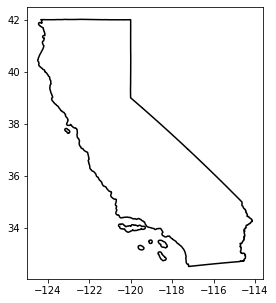

In [107]:
###################### Plot CA Boundary ######################
fig, axs = plt.subplots(figsize = (5, 5))
gdf_CA.plot(ax = axs, facecolor="none", edgecolor = "black", linewidth = 1.5)

In [44]:
###################### Set up the Plotting dataframe ######################
plot_US_train = US_train[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train = plot_US_train.reset_index(drop = True)

print("Min Value: ",plot_US_train['pm25_value'].min())
print("Max Value: ",plot_US_train['pm25_value'].max())

Min Value:  0.43
Max Value:  54.311594202913


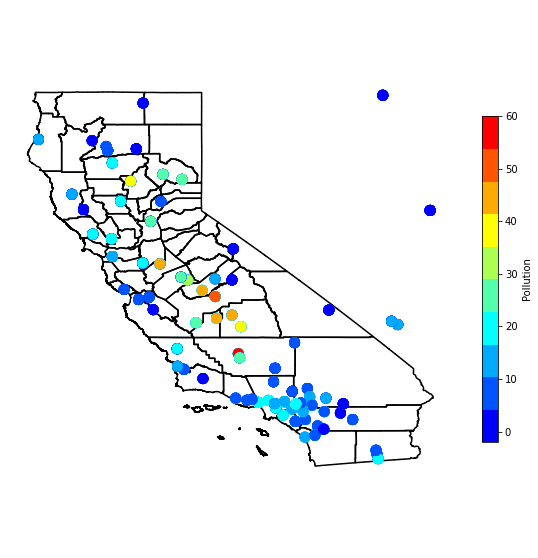

In [45]:
fig, axs = plt.subplots(figsize = (10, 10))

# ax = gdf_CA.plot(facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary
gdf_CA.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)


CA_map = gpd.GeoDataFrame(plot_US_train, geometry = gpd.points_from_xy(plot_US_train.Longitude, plot_US_train.Latitude)) #Create a geodataframe
CA_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds={'label': "Pollution", 'shrink': 0.6}, 
            vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

axs.axis('off') # 4
plt.axis('equal') # 5

plt.savefig("US_train_plot")

plt.show()

In [87]:
############################## The US Test Dataset ############################################################

US_df_test_1 = pd.read_csv('US_data/Test/Test_1.csv')
US_df_test_2 = pd.read_csv('US_data/Test/Test_2.csv')
US_df_test_3 = pd.read_csv('US_data/Test/Test_3.csv')
US_df_test_4 = pd.read_csv('US_data/Test/Test_4.csv')
US_df_test_5 = pd.read_csv('US_data/Test/Test_5.csv')
US_df_test_6 = pd.read_csv('US_data/Test/Test_6.csv')
US_df_test_7 = pd.read_csv('US_data/Test/Test_7.csv')
US_df_test_8 = pd.read_csv('US_data/Test/Test_8.csv')
US_df_test_9 = pd.read_csv('US_data/Test/Test_9.csv')
US_df_test_10 = pd.read_csv('US_data/Test/Test_10.csv')

US_test_frames = [US_df_test_1, US_df_test_2, US_df_test_3, US_df_test_4, US_df_test_5, US_df_test_6, US_df_test_7, US_df_test_8, US_df_test_9, US_df_test_10]
US_test = pd.concat(US_test_frames)
US_test

,pm25_value,narr_dpt,narr_vis,nldas_pevapsfc,nldas_dlwrfsfc,nldas_dswrfsfc,nldas_cape,nldas_pressfc,nldas_tmp2m,nldas_rh2m,...,pd,gc_aod,cmaq_id,cmaq_x,cmaq_y,Latitude,Longitude,year,month,rid
0,13.543333,2.857748e+02,2.000700e+04,0.295834,280.322900,400.545400,0.000000,102022.300000,286.804100,34.326940,...,48.764881,0.009482,53808,-1817627.483,-498157.01720,32.721775,-115.529144,2011,1,6
1,17.512963,2.853648e+02,1.991768e+04,0.345186,279.077889,479.614111,0.000000,101838.222222,286.180778,33.119911,...,48.764881,0.018621,53808,-1817627.483,-498157.01720,32.721775,-115.529144,2011,2,6
2,9.583333,2.875000e+02,1.992285e+04,0.538090,313.046455,645.921727,0.000000,101689.545455,293.714455,28.527727,...,48.764881,0.013888,53808,-1817627.483,-498157.01720,32.721775,-115.529144,2011,3,6
3,10.778333,2.875488e+02,2.000847e+04,0.708689,328.187900,739.387600,1.810290,101369.100000,298.202300,18.822335,...,48.764881,0.024091,53808,-1817627.483,-498157.01720,32.721775,-115.529144,2011,4,6
4,11.388889,2.875388e+02,1.996629e+04,0.765106,335.074333,800.855222,0.195048,101218.666667,300.233444,17.709978,...,48.764881,0.022988,53808,-1817627.483,-498157.01720,32.721775,-115.529144,2011,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,5.266667,6.666670e+19,6.666670e+19,0.612050,327.821667,681.524167,66.445667,88757.866667,294.223500,46.289367,...,5.242290,0.014347,95069,-2179276.411,620594.26136,41.700920,-122.679108,2011,8,6
1308,7.020000,6.666670e+19,6.666670e+19,0.598154,325.257400,550.865600,14.423780,88908.140000,295.786800,29.872340,...,5.242290,0.050777,95069,-2179276.411,620594.26136,41.700920,-122.679108,2011,9,6
1309,4.880000,6.666670e+19,6.666670e+19,0.262669,285.129600,402.733800,3.050060,89152.620000,284.056000,62.653380,...,5.242290,0.001924,95069,-2179276.411,620594.26136,41.700920,-122.679108,2011,10,6
1310,6.760000,6.666670e+19,6.666670e+19,0.166871,289.269800,216.668600,4.816460,88427.680000,279.547400,65.505340,...,5.242290,0.008060,95069,-2179276.411,620594.26136,41.700920,-122.679108,2011,11,6


In [88]:
###################### Set up the Plotting dataframe ######################
plot_US_test = US_test[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_test = plot_US_test.reset_index(drop = True)

print("Min Value: ",plot_US_test['pm25_value'].min())
print("Max Value: ",plot_US_test['pm25_value'].max())

Min Value:  0.43
Max Value:  54.311594202913


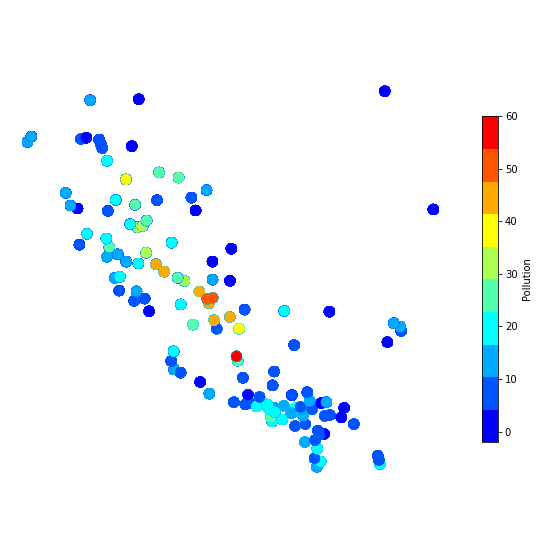

In [103]:
fig, axs = plt.subplots(figsize = (10, 10))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)

CA_test_map = gpd.GeoDataFrame(plot_US_test, geometry = gpd.points_from_xy(plot_US_test.Longitude, plot_US_test.Latitude)) #Create a geodataframe
CA_test_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds={'label': "Pollution", 'shrink': 0.6}
                 , vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

# gdf_CA.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary

axs.axis('off') # 4
plt.axis('equal') # 5

plt.savefig("US_test_plot")
plt.show()

In [62]:
############################## The US Source Dataset ############################################################

US_df_source_1 = pd.read_csv('US_data/Transfer/Transfer_1.csv')
US_df_source_2 = pd.read_csv('US_data/Transfer/Transfer_2.csv')
US_df_source_3 = pd.read_csv('US_data/Transfer/Transfer_3.csv')
US_df_source_4 = pd.read_csv('US_data/Transfer/Transfer_4.csv')
US_df_source_5 = pd.read_csv('US_data/Transfer/Transfer_5.csv')
US_df_source_6 = pd.read_csv('US_data/Transfer/Transfer_6.csv')
US_df_source_7 = pd.read_csv('US_data/Transfer/Transfer_7.csv')
US_df_source_8 = pd.read_csv('US_data/Transfer/Transfer_8.csv')
US_df_source_9 = pd.read_csv('US_data/Transfer/Transfer_9.csv')
US_df_source_10 = pd.read_csv('US_data/Transfer/Transfer_10.csv')

US_source_frames = [US_df_source_1, US_df_source_2, US_df_source_3, US_df_source_4, US_df_source_5, US_df_source_6, US_df_source_7, US_df_source_8, US_df_source_9, US_df_source_10]
US_source = pd.concat(US_source_frames)
print(US_df_source_1.shape, US_df_source_2.shape, US_df_source_3.shape, US_df_source_4.shape, US_df_source_5.shape, US_df_source_6.shape,
     US_df_source_7.shape, US_df_source_8.shape, US_df_source_9.shape, US_df_source_10.shape)

print(US_df_source_1.columns)

(2974, 28) (2873, 28) (2856, 28) (3940, 28) (3442, 28) (3537, 28) (3173, 28) (3776, 28) (2711, 28) (3069, 28)
Index(['pm25_value', 'narr_dpt', 'narr_vis', 'nldas_pevapsfc',
       'nldas_dlwrfsfc', 'nldas_dswrfsfc', 'nldas_cape', 'nldas_pressfc',
       'nldas_tmp2m', 'nldas_rh2m', 'nldas_ugrd10m', 'nldas_vgrd10m',
       'forest_cover', 'elev', 'emissi11', 'local', 'is', 'pd', 'gc_aod',
       'cmaq_id', 'cmaq_x', 'cmaq_y', 'Latitude', 'Longitude', 'year', 'month',
       'rid', 'clust'],
      dtype='object')


In [91]:
###################### Set up the Plotting dataframe ######################
plot_US_source = US_source[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_source = plot_US_source.reset_index(drop = True)

print("Min Value: ",plot_US_source['pm25_value'].min())
print("Max Value: ",plot_US_source['pm25_value'].max())

Min Value:  -1.09166666666667
Max Value:  42.34666666666671


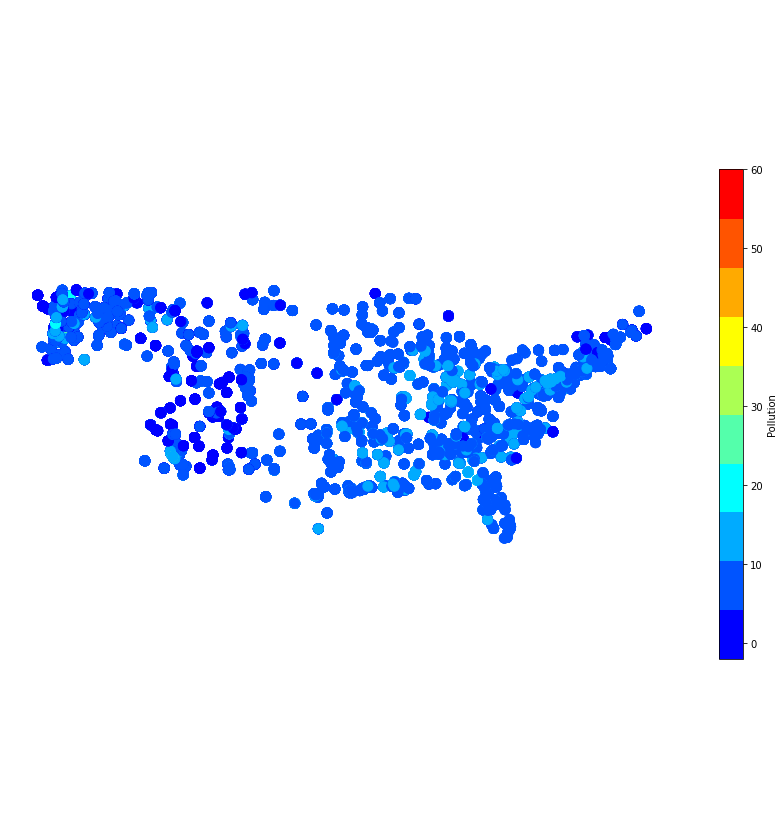

In [104]:
fig, axs = plt.subplots(figsize = (15, 15))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')



CA_source_map = gpd.GeoDataFrame(plot_US_source, geometry = gpd.points_from_xy(plot_US_source.Longitude, plot_US_source.Latitude)) #Create a geodataframe
CA_source_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

# gdf_CA.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary

axs.axis('off') # 4
plt.axis('equal') # 5

plt.savefig("US_source_plot")
plt.show()

In [93]:
ID_train = len(US_train.cmaq_id.unique())
ID_test = len(US_test.cmaq_id.unique())
ID_source = len(US_source.cmaq_id.unique())

set_Train = set(US_train.cmaq_id.unique())
set_Test = set(US_test.cmaq_id.unique())

overlap = set_Train & set_Test
percent_overlap = float(len(overlap)) / len(set_Test) * 100
percent_overlap

63.28125

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin = 0, vmax = 1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [42]:
############################## The US Source Dataset ############################################################

US_df_source_1 = pd.read_csv('US_data/Transfer/Transfer_1.csv')
US_df_source_2 = pd.read_csv('US_data/Transfer/Transfer_2.csv')
US_df_source_3 = pd.read_csv('US_data/Transfer/Transfer_3.csv')
US_df_source_4 = pd.read_csv('US_data/Transfer/Transfer_4.csv')
US_df_source_5 = pd.read_csv('US_data/Transfer/Transfer_5.csv')
US_df_source_6 = pd.read_csv('US_data/Transfer/Transfer_6.csv')
US_df_source_7 = pd.read_csv('US_data/Transfer/Transfer_7.csv')
US_df_source_8 = pd.read_csv('US_data/Transfer/Transfer_8.csv')
US_df_source_9 = pd.read_csv('US_data/Transfer/Transfer_9.csv')
US_df_source_10 = pd.read_csv('US_data/Transfer/Transfer_10.csv')

US_source_frames = [US_df_source_1, US_df_source_2, US_df_source_3, US_df_source_4, US_df_source_5, US_df_source_6, US_df_source_7, US_df_source_8, US_df_source_9, US_df_source_10]
US_source = pd.concat(US_source_frames)
US_source

US_df_source_1

,pm25_value,narr_dpt,narr_vis,nldas_pevapsfc,nldas_dlwrfsfc,nldas_dswrfsfc,nldas_cape,nldas_pressfc,nldas_tmp2m,nldas_rh2m,...,gc_aod,cmaq_id,cmaq_x,cmaq_y,Latitude,Longitude,year,month,rid,clust
0,10.040000,287.718500,19246.220000,0.198746,307.518700,264.914500,1.353376,100577.020000,283.024600,71.381630,...,0.037414,54870,2.752479e+05,-498023.56290,34.451313,-92.997314,2011,12,8,90
1,11.150000,289.973200,17512.890000,0.172674,306.619100,262.937300,2.780340,101277.700000,282.537400,74.209890,...,0.039039,55763,3.356563e+05,-474725.54360,34.641659,-92.328705,2011,12,8,90
2,9.350000,282.717300,18826.230000,0.154684,301.931500,256.341230,2.004570,101252.800000,281.601800,76.140110,...,0.036893,58431,3.845735e+05,-403399.07980,35.266617,-91.757996,2011,12,8,90
3,9.664516,286.773774,17923.066452,0.082540,296.245839,193.786842,5.118673,99697.303226,281.194290,79.709142,...,0.006295,101728,-2.189504e+06,800630.92902,43.228954,-123.443100,2011,1,1,90
4,8.317857,286.548679,18513.742857,0.118411,293.972857,248.346786,20.792883,99376.671429,279.585464,77.668039,...,0.012752,101728,-2.189504e+06,800630.92902,43.228954,-123.443100,2011,2,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,5.466667,288.146167,16346.773333,0.469219,316.746333,564.237800,27.003746,83825.450000,295.371200,29.143717,...,0.024789,80505,-1.124680e+06,212506.22343,40.176510,-109.322327,2011,9,7,73
2970,8.403226,291.283677,19909.435484,0.685000,350.966935,704.047613,245.550584,84420.919355,298.861387,40.304171,...,0.049728,82265,-1.316669e+06,262678.01621,40.349018,-111.656616,2011,7,7,73
2971,6.755645,290.960323,19837.706452,0.684039,343.398387,653.694290,159.897637,84444.664516,299.624839,33.544810,...,0.038969,82265,-1.316669e+06,262678.01621,40.349018,-111.656616,2011,8,7,73
2972,5.233333,288.627000,19023.766667,0.599160,331.821111,680.468111,93.112859,79852.522222,296.485889,33.433256,...,0.044158,86279,-1.098982e+06,368057.98289,41.603043,-109.289795,2011,7,2,73


Min Value:  0.26
Max Value:  42.34666666666671


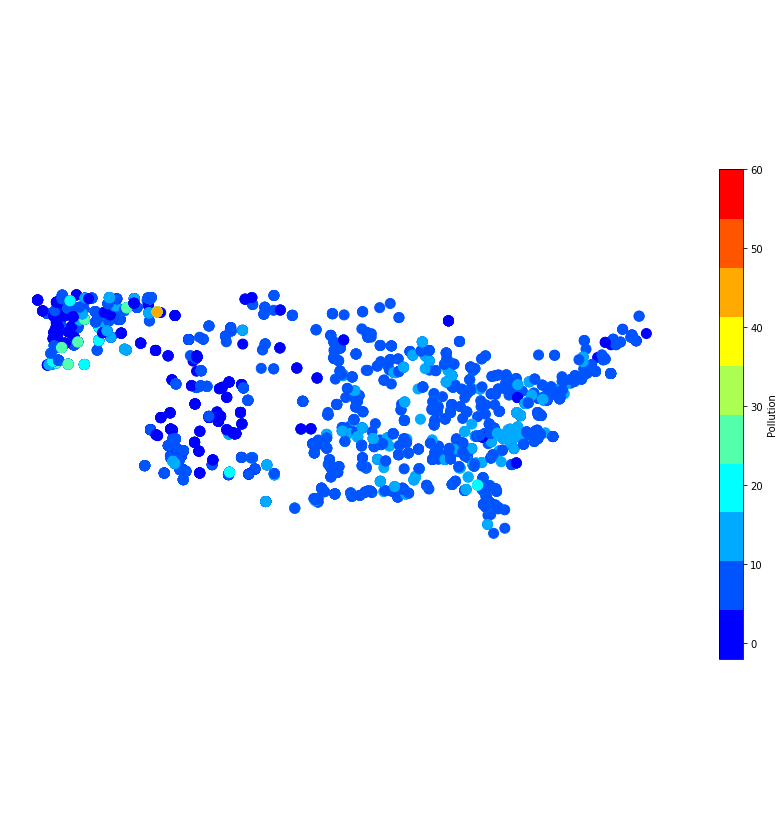

In [9]:
###################### Set up the Source 1 Plotting dataframe ######################
plot_US_source_1 = US_df_source_1[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_source_1 = plot_US_source_1.reset_index(drop = True)

print("Min Value: ",plot_US_source_1['pm25_value'].min())
print("Max Value: ",plot_US_source_1['pm25_value'].max())

fig, axs = plt.subplots(figsize = (15, 15))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')



US_source_1_map = gpd.GeoDataFrame(plot_US_source_1, geometry = gpd.points_from_xy(plot_US_source_1.Longitude, plot_US_source_1.Latitude)) #Create a geodataframe
US_source_1_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

# gdf_CA.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary

axs.axis('off') # 4
plt.axis('equal') # 5

plt.savefig("US_source_1_plot")
plt.show()

Min Value:  -1.09166666666667
Max Value:  23.169565217391302


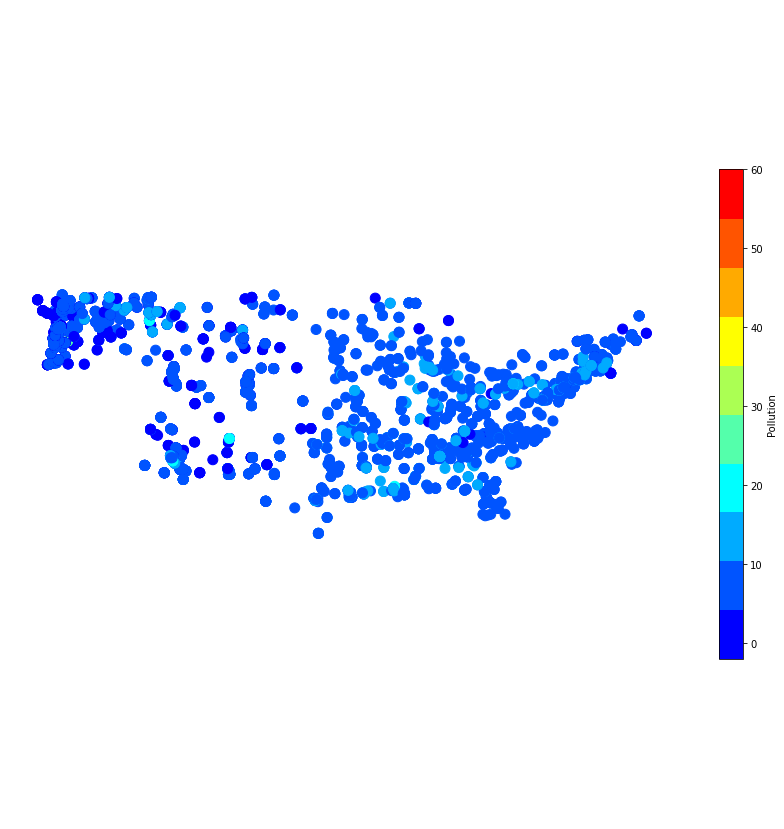

In [11]:
###################### Set up the Source 1 Plotting dataframe ######################
plot_US_source_3 = US_df_source_3[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_source_3 = plot_US_source_3.reset_index(drop = True)

print("Min Value: ",plot_US_source_3['pm25_value'].min())
print("Max Value: ",plot_US_source_3['pm25_value'].max())

fig, axs = plt.subplots(figsize = (15, 15))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')



US_source_2_map = gpd.GeoDataFrame(plot_US_source_3, geometry = gpd.points_from_xy(plot_US_source_3.Longitude, plot_US_source_3.Latitude)) #Create a geodataframe
US_source_2_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

# gdf_CA.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary

axs.axis('off') # 4
# plt.axis('equal') # 5

plt.savefig("US_source_3_plot")
plt.show()

Min Value:  0.5625
Max Value:  49.683870967741896
Min Value:  0.43
Max Value:  49.683870967741896
Min Value:  0.842857142857143
Max Value:  37.816129032258104
Min Value:  0.68
Max Value:  25.1483333333333
Min Value:  0.62
Max Value:  41.4602150537419
Min Value:  0.5625
Max Value:  25.1483333333333
Min Value:  0.43
Max Value:  54.311594202913
Min Value:  0.68
Max Value:  29.43
Min Value:  0.68
Max Value:  44.7290322580645


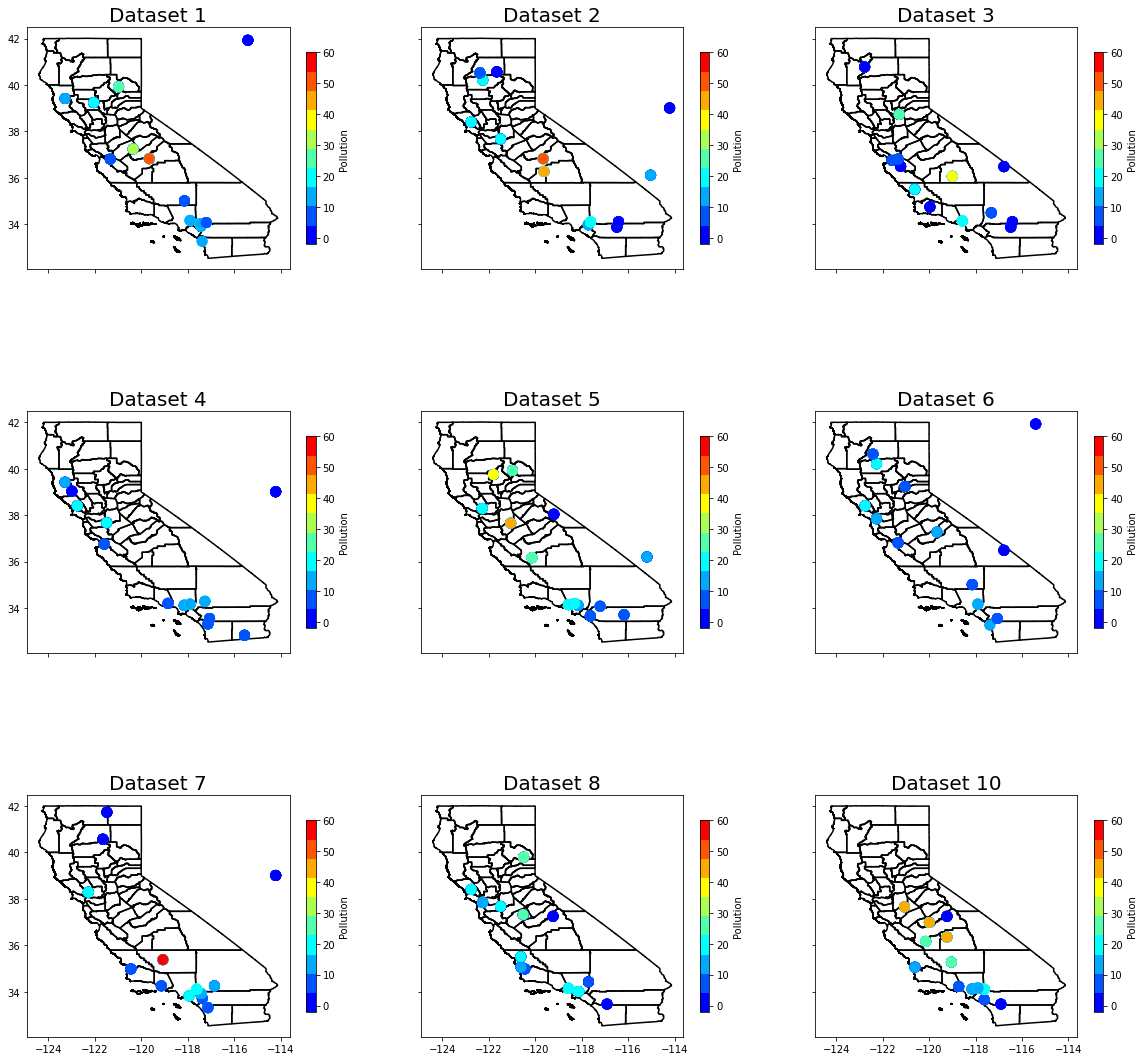

In [50]:
###################### Set up the Train 3 Plotting dataframe ######################

import matplotlib.pyplot as plt

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize = (20, 20))


###################### Train 1 ######################
plot_US_train_1 = US_df_train_1[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_1 = plot_US_train_1.reset_index(drop = True)

print("Min Value: ",plot_US_train_1['pm25_value'].min())
print("Max Value: ",plot_US_train_1['pm25_value'].max())

# fig, axs = fig.subplots(2,2,2)

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')


gdf_CA.plot(ax = ax1, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_1_map = gpd.GeoDataFrame(plot_US_train_1, geometry = gpd.points_from_xy(plot_US_train_1.Longitude, plot_US_train_1.Latitude)) #Create a geodataframe
US_train_1_map.plot(column = 'pm25_value', ax = ax1, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe


ax1.set_title("Dataset 1", fontsize = 20)

###################### Train 2 ######################

plot_US_train_2 = US_df_train_2[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_2 = plot_US_train_2.reset_index(drop = True)

print("Min Value: ",plot_US_train_2['pm25_value'].min())
print("Max Value: ",plot_US_train_2['pm25_value'].max())

gdf_CA.plot(ax = ax2, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_2_map = gpd.GeoDataFrame(plot_US_train_2, geometry = gpd.points_from_xy(plot_US_train_2.Longitude, plot_US_train_2.Latitude)) #Create a geodataframe
US_train_2_map.plot(column = 'pm25_value', ax = ax2, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

ax2.set_title("Dataset 2", fontsize = 20)

###################### Train 3 ######################

plot_US_train_3 = US_df_train_3[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_3 = plot_US_train_3.reset_index(drop = True)

print("Min Value: ",plot_US_train_3['pm25_value'].min())
print("Max Value: ",plot_US_train_3['pm25_value'].max())

gdf_CA.plot(ax = ax3, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_3_map = gpd.GeoDataFrame(plot_US_train_3, geometry = gpd.points_from_xy(plot_US_train_3.Longitude, plot_US_train_3.Latitude)) #Create a geodataframe
US_train_3_map.plot(column = 'pm25_value', ax = ax3, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

ax3.set_title("Dataset 3", fontsize = 20)

###################### Train 4 ######################

plot_US_train_4 = US_df_train_4[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_4 = plot_US_train_4.reset_index(drop = True)

print("Min Value: ",plot_US_train_4['pm25_value'].min())
print("Max Value: ",plot_US_train_4['pm25_value'].max())

gdf_CA.plot(ax = ax4, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_4_map = gpd.GeoDataFrame(plot_US_train_4, geometry = gpd.points_from_xy(plot_US_train_4.Longitude, plot_US_train_4.Latitude)) #Create a geodataframe
US_train_4_map.plot(column = 'pm25_value', ax = ax4, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

ax4.set_title("Dataset 4", fontsize = 20)

###################### Train 5 ######################

plot_US_train_5 = US_df_train_5[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_5 = plot_US_train_5.reset_index(drop = True)

print("Min Value: ",plot_US_train_5['pm25_value'].min())
print("Max Value: ",plot_US_train_5['pm25_value'].max())

gdf_CA.plot(ax = ax5, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_5_map = gpd.GeoDataFrame(plot_US_train_5, geometry = gpd.points_from_xy(plot_US_train_5.Longitude, plot_US_train_5.Latitude)) #Create a geodataframe
US_train_5_map.plot(column = 'pm25_value', ax = ax5, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

ax5.set_title("Dataset 5", fontsize = 20)

###################### Train 6 ######################

plot_US_train_6 = US_df_train_6[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_6 = plot_US_train_6.reset_index(drop = True)

print("Min Value: ",plot_US_train_6['pm25_value'].min())
print("Max Value: ",plot_US_train_6['pm25_value'].max())

gdf_CA.plot(ax = ax6, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_6_map = gpd.GeoDataFrame(plot_US_train_6, geometry = gpd.points_from_xy(plot_US_train_6.Longitude, plot_US_train_6.Latitude)) #Create a geodataframe
US_train_6_map.plot(column = 'pm25_value', ax = ax6, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

ax6.set_title("Dataset 6", fontsize = 20)

###################### Train 7 ######################

plot_US_train_7 = US_df_train_7[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_7 = plot_US_train_7.reset_index(drop = True)

print("Min Value: ",plot_US_train_7['pm25_value'].min())
print("Max Value: ",plot_US_train_7['pm25_value'].max())

gdf_CA.plot(ax = ax7, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_7_map = gpd.GeoDataFrame(plot_US_train_7, geometry = gpd.points_from_xy(plot_US_train_7.Longitude, plot_US_train_7.Latitude)) #Create a geodataframe
US_train_7_map.plot(column = 'pm25_value', ax = ax7, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

ax7.set_title("Dataset 7", fontsize = 20)

###################### Train 8 ######################

plot_US_train_8 = US_df_train_8[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_8 = plot_US_train_8.reset_index(drop = True)

print("Min Value: ",plot_US_train_8['pm25_value'].min())
print("Max Value: ",plot_US_train_8['pm25_value'].max())

gdf_CA.plot(ax = ax8, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_8_map = gpd.GeoDataFrame(plot_US_train_8, geometry = gpd.points_from_xy(plot_US_train_8.Longitude, plot_US_train_8.Latitude)) #Create a geodataframe
US_train_8_map.plot(column = 'pm25_value', ax = ax8, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

ax8.set_title("Dataset 8", fontsize = 20)

###################### Train 10 ######################

plot_US_train_10 = US_df_train_10[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_train_10 = plot_US_train_10.reset_index(drop = True)

print("Min Value: ",plot_US_train_10['pm25_value'].min())
print("Max Value: ",plot_US_train_10['pm25_value'].max())

gdf_CA.plot(ax = ax9, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_train_10_map = gpd.GeoDataFrame(plot_US_train_10, geometry = gpd.points_from_xy(plot_US_train_10.Longitude, plot_US_train_10.Latitude)) #Create a geodataframe
US_train_10_map.plot(column = 'pm25_value', ax = ax9, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

ax9.set_title("Dataset 10", fontsize = 20)


plt.savefig("US_train_all_plot")
plt.show()

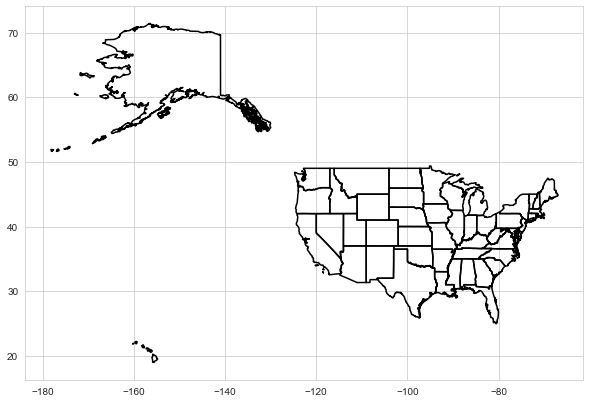

In [157]:
gdf_US = gpd.read_file('ShapeFolder/States_shapefile-shp/States_shapefile.shp')
gdf_US = gdf_US.to_crs(epsg=4326)

###################### Plot World Boundary ######################
fig, axs = plt.subplots(figsize = (10, 10))
gdf_US.plot(ax = axs, facecolor="none", edgecolor = "black", linewidth = 1.5)

In [164]:
############ CONUS: Contigous US ###################
US_df = pd.read_csv('US_data/CONUS_2011/CONUS_2011.csv')

US_df.shape

(73007, 63)

Min Value:  -1.9
Max Value:  136.8


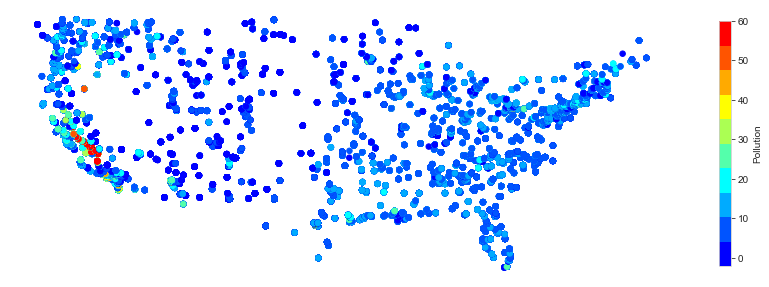

In [159]:
###################### Set up the US Plotting dataframe ######################
plot_US = US_df[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US = plot_US.reset_index(drop = True)

print("Min Value: ",plot_US['pm25_value'].min())
print("Max Value: ",plot_US['pm25_value'].max())

fig, axs = plt.subplots(figsize = (15, 15))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')


# gdf_US.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_map = gpd.GeoDataFrame(plot_US, geometry = gpd.points_from_xy(plot_US.Longitude, plot_US.Latitude)) #Create a geodataframe

ax_world = US_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.3}, 
                   vmin= -2, vmax = 60, markersize = 30) #Plot the geodatframe


# ax_world.set_title('PM 2.5 US')

# fig = ax_world.get_figure()
# # add colorbar axes to the figure
# # here, need trial-and-error to get [l,b,w,h] right
# # l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
# cbax = fig.add_axes([0.1, 0.1, 0.03, 0.8])  #[left, bottom, width, height] 
# # cbax.set_title('PM 2.5')
# sm = plt.cm.ScalarMappable(cmap = rainbow_colors, norm = plt.Normalize(vmin = -2, vmax = 60))
# sm._A = []
# fig.colorbar(sm, cax = cbax, format="%d")


axs.axis('off') # 4
# plt.axis('equal') # 5

plt.savefig("US_complete_plot")
plt.show()

(14636, 63)
Min Value:  -1.1
Max Value:  77.8


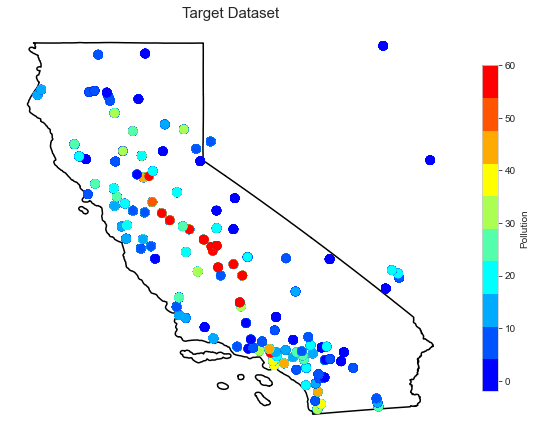

In [166]:
sns.set_style("whitegrid")

CA_df = US_df.loc[US_df['rid'] == 6]
print(CA_df.shape)
CA_df.to_csv('CA_target.csv', index = False)  

plot_CA = CA_df[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_CA = plot_CA.reset_index(drop = True)

print("Min Value: ",plot_CA['pm25_value'].min())
print("Max Value: ",plot_CA['pm25_value'].max())

fig, axs = plt.subplots(figsize = (10, 10))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')
magma = cm.get_cmap('magma')


gdf_CA.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


CA_map = gpd.GeoDataFrame(plot_CA, geometry = gpd.points_from_xy(plot_CA.Longitude, plot_CA.Latitude)) #Create a geodataframe
CA_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax = 60, markersize = 70) #Plot the geodatframe

# gplt.choropleth(geodata, hue = geodata['Data'])

axs.axis('off') # 4
# plt.axis('equal') # 5
plt.title('Target Dataset', fontsize = 15)

plt.savefig("US_CA_target_plot")
plt.show()

(58371, 63)
Min Value:  -1.9
Max Value:  136.8


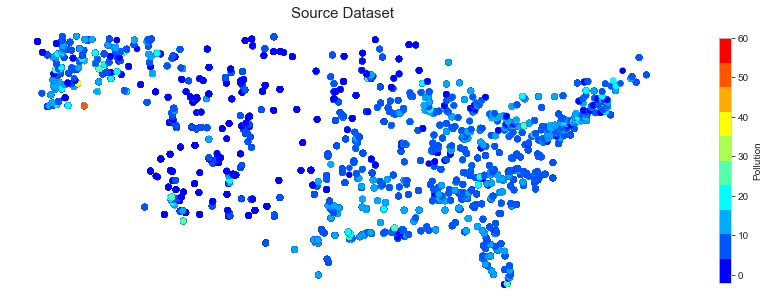

In [167]:
US_source_df = US_df.loc[US_df['rid'] != 6]
print(US_source_df.shape)
US_source_df.to_csv('US_source.csv', index = False)  


plot_US = US_source_df[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US = plot_US.reset_index(drop = True)

print("Min Value: ",plot_US['pm25_value'].min())
print("Max Value: ",plot_US['pm25_value'].max())

fig, axs = plt.subplots(figsize = (15, 15))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')


# gdf_US.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary


US_map = gpd.GeoDataFrame(plot_US, geometry = gpd.points_from_xy(plot_US.Longitude, plot_US.Latitude)) #Create a geodataframe

ax_world = US_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.3}, 
                   vmin= -2, vmax = 60, markersize = 30) #Plot the geodatframe


# ax_world.set_title('PM 2.5 US')

# fig = ax_world.get_figure()
# # add colorbar axes to the figure
# # here, need trial-and-error to get [l,b,w,h] right
# # l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
# cbax = fig.add_axes([0.1, 0.1, 0.03, 0.8])  #[left, bottom, width, height] 
# # cbax.set_title('PM 2.5')
# sm = plt.cm.ScalarMappable(cmap = rainbow_colors, norm = plt.Normalize(vmin = -2, vmax = 60))
# sm._A = []
# fig.colorbar(sm, cax = cbax, format="%d")


axs.axis('off') # 4
# plt.axis('equal') # 5
plt.title('Source Dataset', fontsize = 15)

plt.savefig("US_source_plot")
plt.show()

In [ ]:
gdf_US = gpd.read_file('ShapeFolder/States_shapefile-shp/States_shapefile.shp')
gdf_US = gdf_US.to_crs(epsg=4326)

